In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv
/kaggle/input/test.csv


# Data Preprocessing

In [2]:
import pandas as pd
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")
refrence = train.copy()

In [3]:
train.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [4]:
test.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0


# WORKFLOW USED

**All the necessary steps are followed**

1. Remove redundant features eg -> ID.
2. Drop that feature which have max number of null values.
3. Handle missing values.
4. Apply Encoders if required.
5. Remove Columns with zero variance.
6. Check for the unique values i.e whether it is binary classification or regression.
7. Handle Outliers if have.
8. Check the corelation.
9. Split The data.
10. Standardise the data.
11. Use PCA or LDA if required.
12. Get the model.
13. Do the hyperparameter tuning of the data.
14. Predict

In [6]:
# Removing Redundant Data
train.drop('ID', axis = 1, inplace = True)

In [7]:
train.columns[train.isnull().any()].tolist()

[]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [9]:
coltrain = train.select_dtypes(include='object')

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [11]:
coltest = test.select_dtypes(include='object')

In [12]:
coltest.columns.tolist()==coltrain.columns.tolist()

True

In [13]:
# create unique values in the coltrain and coltest and then remove those rows which are not in intersection of both
unique_in_coltrain = {}
for i in coltrain:
    unique_in_coltrain[i] = coltrain[i].unique().tolist()
    
unique_in_coltest = {}
for i in coltest:
    unique_in_coltest[i] = coltest[i].unique().tolist()

In [14]:
for i in unique_in_coltrain:
    if sorted(unique_in_coltrain[i]) == sorted(unique_in_coltest[i]):
        continue
    else:
        print(i)   # all those features which are categorical but the unique data do not matches with train and test data so we want to remove that rows

X0
X2
X5


In [15]:
remove_rows = {}
flagged = ['X0', 'X2', 'X5']
for i in flagged:
    k = 0
    r = []
    for j in unique_in_coltrain[i]:
        if j not in unique_in_coltest[i]:
            r.append(j)
    #remove_rows[i] = r
       
    for j in unique_in_coltest[i]:
        if j not in unique_in_coltrain[i]:
            r.append(j)
    remove_rows[i] = r
remove_rows            

{'X0': ['q', 'aa', 'ac', 'ab', 'av', 'ag', 'an', 'ae', 'p', 'bb'],
 'X2': ['l', 'aa', 'c', 'o', 'ar', 'aj', 'ax', 'ab', 'w', 'ad', 'u'],
 'X5': ['u', 't', 'b', 'a', 'z']}

In [16]:
for i in remove_rows:
    j = 0
    while j<len(remove_rows[i]):
        train = train[train[i] != remove_rows[i][j]]
        j+=1

In [17]:
# Encoding the data
train = pd.get_dummies(train)
train.head(3)

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
1,88.53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4197 entries, 1 to 4208
Columns: 554 entries, y to X8_y
dtypes: float64(1), int64(368), uint8(185)
memory usage: 12.6 MB


In [19]:
# checking for features with zero variance
duplicated = [train[i].nunique() for i in train.columns]

k = 0
removed_features = []
for i in train.columns:
    if duplicated[k] == 1:
        train.drop(i, inplace = True, axis = 1)
        removed_features.append(i)
    k+=1
removed_features

['X11',
 'X93',
 'X107',
 'X204',
 'X205',
 'X233',
 'X235',
 'X236',
 'X257',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X339',
 'X347']

In [20]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4197 entries, 1 to 4208
Columns: 537 entries, y to X8_y
dtypes: float64(1), int64(351), uint8(185)
memory usage: 12.0 MB


In [21]:
x = train.drop('y', axis = 1)
y = train['y']

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from xgboost import XGBRegressor 
from xgboost import XGBRFRegressor
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [23]:
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.20, random_state = 1)

model = PCA(random_state = 1, whiten=True,svd_solver='full')
parameters = {'n_components':np.arange(50, 75)}
len(list(ParameterGrid(parameters)))*5    #Total number of model will be created, just to analyse the time complexity.

grid_search = GridSearchCV(model, parameters, cv = 5)
grid_search.fit(trainx)
print(grid_search.best_params_)

In [24]:
pca = PCA(n_components=65, random_state=1, whiten=True,svd_solver='full')
pca.fit(trainx)
trainx = pca.transform(trainx)
testx = pca.transform(testx)
print(pca.explained_variance_ratio_)

[0.11363077 0.0794093  0.07411849 0.05815911 0.04817928 0.04152649
 0.03327041 0.02868957 0.02518488 0.02193179 0.02050781 0.01717715
 0.01501595 0.0143854  0.01403207 0.0130708  0.01224228 0.01098967
 0.00994982 0.00911516 0.00874654 0.00851095 0.00835501 0.00777174
 0.0073569  0.00708646 0.00697098 0.00660112 0.00655    0.00615092
 0.00583073 0.00558688 0.00514487 0.00489619 0.00479449 0.00444552
 0.00428049 0.00423111 0.00403317 0.00396795 0.00385759 0.00382253
 0.00366486 0.00345402 0.00342138 0.00334408 0.00313598 0.00312119
 0.00299702 0.00290846 0.00279983 0.00276108 0.00273505 0.00261129
 0.00254047 0.00245429 0.00241571 0.00240041 0.00230793 0.00227811
 0.00221649 0.00220823 0.00213517 0.00209457 0.00209233]


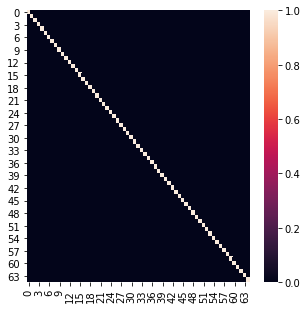

In [25]:
plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(trainx).corr().head(65))

# Implementing XGBoost Regressor

model = XGBRegressor(random_state=1, verbosity=0, max_depth=4)
parameters = {'learning_rate':np.arange(0.01, 0.1, 0.01), 'gamma':np.arange(0.01,0.2, 0.1)}
len(list(ParameterGrid(parameters)))*5

grid_search = GridSearchCV(model, parameters, cv = 5, scoring='r2')
grid_search.fit(trainx, trainy)
print(grid_search.best_params_)

In [26]:
xgb = XGBRegressor(max_depth=3,learning_rate=0.09 ,random_state=1, n_estimators=50, verbosity=0, gamma=0.01)
xgb.fit(trainx, trainy)
print(f'Training score = {xgb.score(trainx, trainy)}')
print(f'Testing score = {xgb.score(testx, testy)}')

Training score = 0.5534742446852117
Testing score = 0.5539966106551832


In [27]:
y_pred = xgb.predict(testx)
print(f'R2 Score = {r2_score(testy, y_pred)}')
print(f'Explained Variance Score = {explained_variance_score(testy, y_pred, )}')
print(f'MSE = {mean_squared_error(testy, y_pred)}')

R2 Score = 0.5539966106551832
Explained Variance Score = 0.5559945607533392
MSE = 63.10728153790973


# Analysing test data

In [28]:
test = pd.read_csv("../input/test.csv")
test.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
# Removing Redundant Data
test.drop('ID', inplace = True, axis = 1)

In [30]:
# Checking for null values
test.columns[test.isnull().any()].tolist()

[]

In [31]:
# removing all those data which are not in intersection with training data
for i in remove_rows:
    j = 0
    while j<len(remove_rows[i]):
        test = test[test[i] != remove_rows[i][j]]
        j+=1

In [32]:
# Data Encoded
test = pd.get_dummies(test)

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 4 to 4208
Columns: 552 entries, X10 to X8_y
dtypes: int64(368), uint8(184)
memory usage: 12.5 MB


## Removing those rows which were not in training data but due to encoding created more features

In [34]:
# Removing Feature having zero variance
for i in removed_features:
    test.drop(i, inplace = True, axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 4 to 4208
Columns: 535 entries, X10 to X8_y
dtypes: int64(351), uint8(184)
memory usage: 12.0 MB


In [35]:
for i in x.columns:
    if i not in test.columns:
        print(i)

X2_av


In [36]:
x.columns.tolist().index('X2_av')

438

In [37]:
# Adding X2_av to test data with all values to be zero as in test set we had only one occurance to av in X2 wchich was deleted when deleting bb from X0
test.insert(loc=438, column = 'X2_av', value = np.zeros(len(test)))

In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4197 entries, 1 to 4208
Columns: 536 entries, X10 to X8_y
dtypes: int64(351), uint8(185)
memory usage: 12.0 MB


In [39]:
test = pca.transform(test)

In [40]:
predicted = xgb.predict(test)

In [41]:
predicted

array([110.97419,  91.72853, 107.07609, ...,  98.16836, 108.47592,
        96.49193], dtype=float32)